# ***INSTRUCTIONS***

The code is now separated to organize a bit. Run the blocks of code from top to bottom to initialize each block.
Variables and functions defined in higher blocks can travel and be used in lower blocks.

# ***IMPORT STATEMENTS***

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt
import itertools
import random


def random_permutation(iterable, r=None):
    "Random selection from itertools.permutations(iterable, r)"
    pool = tuple(iterable)
    r = len(pool) if r is None else r
    return tuple(random.sample(pool, r))

#----------------------------------------------------------------------------------------------
#Parameters
inn = 'inn'
out = 'out'
N = 'N'
S = 'S'
E = 'E'
W = 'W'

#----------------------------------------------------------------------------------------------
#lot = [[1,2,3], [3,1,4], [1,4,2]]
#lots consist of a sequence of squares 
#each square is denoted by [x,y,z] having x west, z east, and y north and south.

# ***HELPER FUNCTIONS ***

In [ ]:
def gen(Lot):                                                                   #RETURNS THE GENERATORS OF A LOT IN A LIST
	gens = []
	# for item in Lot:
	# 	for label in item:
	# 		if label not in gens:
	# 			gens.append(label)
	counter = 1
	for i in range(len(Lot)+1):
		gens.append(counter)
		counter+=1

	return gens
#----------------------------------------------------------------------------------------------
def getVertices(Lot):
	gens = gen(Lot)

	vertices = []

	for item in gens:
		vertices.append((item, inn))
		vertices.append((item, out))

	return vertices
#----------------------------------------------------------------------------------------------
def link(Lot):
	J = nx.MultiGraph()
	vertices = getVertices(Lot)
	for item in vertices:
		if item[1] == inn:
			J.add_node(item)
		if item[1] == out:
			J.add_node(item)

	for square in Lot:
		J.add_edge((square[0], inn), (square[1], out))
		J.add_edge((square[0], out), (square[1], out))
		J.add_edge((square[1], inn), (square[2], out))
		J.add_edge((square[1], inn), (square[2], inn))

	return J
#----------------------------------------------------------------------------------------------
def selection(choice, square):
		if choice == N:
			return(square[1])
		if choice == S:
			return(square[1])
		if choice == E:
			return(square[2])
		if choice== W:
			return(square[0])

#----------------------------------------------------------------------------------------------
def injective(bridgechoice,lot):                                                #This can be sped up
	for x in range(0,len(bridgechoice)):
		for y in range(x+1 ,len(bridgechoice)):
			if selection(bridgechoice[x],lot[x])  == selection(bridgechoice[y],lot[y]):
				return False

	return True  

#----------------------------------------------------------------------------------------------
def strip(J, U):																																#Takes input a graph (and a set U of a few vertices we want to keep track of),
	J_stripped = J.copy() 																												#searches for edges having a degree 1 vertex (on either side)                              
	nodeList = list(J.degree(J.nodes()))																					#and removes those edges but keeps the vertices
	for i in range(len(nodeList)):																								#Repeats this until no edges have been removed. Returns the result:
		if nodeList[i][1] == 1:
			nodeNeighbor = list(J.neighbors(nodeList[i][0]))
			if nodeNeighbor[0] != nodeList[i][0]:

				if J_stripped.has_edge(nodeNeighbor[0], nodeList[i][0]):
					J_stripped.remove_edge(nodeNeighbor[0], nodeList[i][0])
				if J_stripped.has_edge(nodeList[i][0], nodeNeighbor[0]):
					J_stripped.remove_edge(nodeList[i][0], nodeNeighbor[0])
	return (J_stripped, U)

#----------------------------------------------------------------------------------------------
def Ord(s, M):																																	#this will allow us to compare two elements of K with 
	return M.index(s)																															#respect to some ordering M of K

#----------------------------------------------------------------------------------------------
#if some element of cycle or dumbell has a minimal vertex with +1 charge
#then return false else return true
#Enumerating all cycles and dumbells is not an efficient way to do this:
#Instead for each vertex v in K  (which is the vertex set of link)
#and such that v has charge +1, we try to form a "generalized cycle" above v as follows:.
#Let  S < link be the full subgraph where the vertices s of S satisfy s>= v. 
#(so S consists of all vertices at least as high as v, and all edges between them)
#Repeat the following:
#Remove ALL edges that have a degree 1 endpoint. 
#if deg(v)< 2 at some stage, then Return True (that +1 vertex is good)
#Otherwise, the process terminates (at a subgraph where deg(v)>1) and Return False.
#the following is repeated from above
def vertexcheck(bridgechoice, charge, M, lot):
	G = link(lot)
	L = gen(lot)
	for i in range(len(L)):
		if charge[i] == 1:
	 		x = (L[i],inn)
		if charge[i] == -1:
	 		x = (L[i],out)

		higherList = []
		for node in list(G.nodes()):																								#let J be  the induced subgraph of link having 
			if Ord(node, M) >= Ord(x, M):																							#vertices s  with  Ord(s,M) >= Ord(x,M)
				higherList.append(node)
		G_sub = G.subgraph(higherList)

		(S,x) = strip(G_sub,x)
		if S.degree(x) != 0: 
			return False
	return True

#----------------------------------------------------------------------------------------------
def CriticalEdge(compass,sign,square):																					#returns an ordered pair.
	if (compass,sign)== (N,-1): 																									#The first element is the critical vertex the entire pair is the critical edge.
		return ((selection(N,square), inn),(selection(E,square),inn))
	if (compass,sign)== (N,+1):
		return ((selection(N,square),out),(selection(W,square),inn))								#bridge (critical) edge = (critical vertex, and anticritical vertex (key vertex)) depends on charge!
	if (compass,sign)== (S,-1): 
		return ((selection(S,square),inn),(selection(E,square),out))
	if (compass,sign)==(S,+1): 
		return ((selection(S,square),out),(selection(W,square),out))
	if (compass,sign)==(E,-1): 
		return ((selection(E,square),inn),(selection(N,square),inn))
	if (compass,sign)==(E,+1): 
		return ((selection(E,square),out),(selection(S,square),inn))
	if (compass,sign)==(W,-1): 
		return ((selection(W,square),inn),(selection(N,square),out))
	if (compass,sign)==(W,+1): 
		return ((selection(W,square),out),(selection(S,square),out))

# I THINK THIS WAS INCORRECT ( I reversed  the signs in the if clause)
#def CriticalEdge(compass,sign,square):																					#returns an ordered pair.
#	if (compass,sign)== (N,+1): 																									#The first element is the critical vertex the entire pair is the critical edge.
#		return  ((selection(N,square), inn),(selection(E,square),inn))
#	if (compass,sign)== (N,-1):
#		return ((selection(N,square),out),(selection(W,square),inn))
#	if (compass,sign)== (S,+1): 
#		return ((selection(S,square),inn),(selection(E,square),out))
#	if (compass,sign)==(S,-1): 
#		return ((selection(S,square),out),(selection(W,square),out))
#	if (compass,sign)==(E,+1): 
#		return ((selection(E,square),inn),(selection(N,square),inn))
#	if (compass,sign)==(E,-1): 
#		return ((selection(E,square),out),(selection(S,square),inn))
#	if (compass,sign)==(W,+1): 
#		return ((selection(W,square),inn),(selection(N,square),out))
#	if (compass,sign)==(W,-1): 
#		return ((selection(W,square),out),(selection(S,square),out))
#----------------------------------------------------------------------------------------------
#takes input : LOT, bridgechoice= choice of NSEW for each square, charge= choice of +1 or -1 for each element of L,  M = an ordering of K,  Lot under investigation)
def edgecheck(bridgechoice,charge,M,lot):
	G = link(lot)
	L = gen(lot)
# follows variant of procedure in check(link, bridgechoice, charge, M)
# difference is that there is a "critical" edge at the bottom
	for i in range(len(lot)):
			(x,y) = CriticalEdge(bridgechoice[i],charge[L.index(selection(bridgechoice[i], lot[i]))], lot[i])        
			#charge[blaah] refers to the correct index in the charge list for the associated generator
			#I was confused about this logical turn. 
		
			if Ord(x,M)<Ord(y,M):
			#
			# Instead, it should only perform the test if y  is (k,inn) and charge(k)=-1 or  y is (k,out) and charge(k)=+1  where charge(gen) means charge(lookup_position_in_list(gen)) ...


			#if Ord(y,M)<Ord(x,M) in the order then there is nothing to check and a True is returned.
			# we can omit this to save a logic step in the programming, or keep it to make the program faster.
			#let J be  the induced subgraph of link having vertices s  with  Ord(s,M) >= Ord(x,M)
			#create the subgraph s.t. every vertex in link >= x is in subgraph
			#repeatedly remove edges having a degree 1 vertex until cannot anymore 
			#	if valence(x)<2 or valence(y) < 2 return True
			#    else return False
				#repeatedly remove edges having a degree 1 vertex until cannot anymore 
			#	if valence(x)<2 or valence(y) < 2 return True
			#    else return False
				higherList = []
				for node in list(G.nodes()):
					if Ord(node, M) >= Ord(x, M):   #add all vertices higher than either vertex of the critical edge 
						higherList.append(node)
				G_sub = G.subgraph(higherList)	
				(S,[x,y]) = strip(G,[x,y])
				if S.degree(x) != 0 and S.degree(y) != 0:
					return False
	
	return True

#IMPORTANT
#selection(bridgechoice[i], lot[i]) is a generator then get charge from there
#charge[L.index(selection(bridgechoice[i], lot[i]))]
#----------------------------------------------------------------------------------------------
#Builder functions for complete lists of charges and bridges
#Definitely could be done better
def chargeBuilder(lot):
	chargeList = []
	length = len(lot)
	charges = [1,-1]
	if length == 2:
		for i in charges:
			for j in charges:
				for k in charges:
					charge = [i,j,k]
					chargeList.append(charge)
	if length == 3:
		for i in charges:
			for j in charges:
				for k in charges:
					for l in charges:
						charge = [i,j,k,l]
						chargeList.append(charge)
	if length == 4:
		for i in charges:
			for j in charges:
				for k in charges:
					for l in charges:
						for m in charges:
							charge = [i,j,k,l,m]
							chargeList.append(charge)
	return(chargeList)

def bridgeBuilder(lot):
	bridgeList = []
	length = len(lot)
	bridges = [N,S,E,W]
	if length == 2:
		for i in bridges:
			for j in bridges:
				bridge = [i,j]
				bridgeList.append(bridge)
	if length == 3:
		for i in bridges:
			for j in bridges:
				for k in bridges:
					bridge = [i,j,k]
					bridgeList.append(bridge)
	if length == 4:
		for i in bridges:
			for j in bridges:
				for k in bridges:
					for l in bridges:
						bridge = [i,j,k, l]
						bridgeList.append(bridge)
	return(bridgeList)


# ***MAIN PROGRAMS***

In [ ]:
# def singleMain(lot):																														#Checks with a specified charge and bridge
#   G = link(lot)
#   L = gen(lot)
#   K = getVertices(lot)
#   goodList=[]
#   bridgeFlag = False
#   if injective(bridge, lot):
#     counter = 0
#   for M in itertools.permutations(K):
# counter += 1
# if counter % 10000 == 0:
# print(counter)
# if (vertexcheck(bridge, charge, M, lot) and edgecheck(bridge, charge, M, lot)):
# print(M)
# goodList.append([bridge, charge, M, lot])
# bridgeFlag = True		
# print(bridge, bridgeFlag, len(goodList))

In [ ]:
#MAIN PROGRAM
#Given a Lot
#examines each possible orderings of K
#examines all possible charges of generators +1 or -1.
#for each of these, it chooses sides of squares N S E W and makes sure they are all different,
#then checks the links

# for M in Orders(K):    #that is, the set of all ways of putting K in some linear order first to last.
#     for charge in (-1,1)^L:    #each element of (-1,1)^L is a choice of -1 or +1 for a corresponding element of L = L(Lot)
#     	for bridgechoice in {N,S,E,W}^(len(Lot)+1)   
# 		if injective(bridgechoice):		
# 			return (vertexcheck(link, L, bridgechoice, charge, M) and edgecheck(link, L, bridgechoice, charge, M, Lot))


def main(lot):																																	#The first rendition of the main program, it works.
	G = link(lot)
	L = gen(lot)
	K = getVertices(lot)
	chargeList = chargeBuilder(lot)
	bridgeList = bridgeBuilder(lot)
	goodList = []

	for M in itertools.permutations(K):
		for charge in chargeList:
			for bridge in bridgeList:
				#print(bridge)
				if injective(bridge, lot):
					if (vertexcheck(bridge, charge, M, lot) and edgecheck(bridge, charge, M, lot)):
						goodList.append([bridge, charge, M, lot])

	return goodList

def smallMain(lot, charge):																															#Another version of the main program
	G = link(lot)
	L = gen(lot)
	K = getVertices(lot)
	bridgeList = bridgeBuilder(lot)
	for bridge in bridgeList:
		goodList=[]
		bridgeFlag = False
		if injective(bridge, lot):
			for M in itertools.permutations(K):
				if (vertexcheck(bridge, charge, M, lot) and edgecheck(bridge, charge, M, lot)):
					goodList.append([bridge, charge, M, lot])
			bridgeFlag = True		
		print(bridge, bridgeFlag, len(goodList))


def injectiveBridges(lot):																											#For a lot, builds list of all injective bridge choices
	injectiveBridgeList = []
	bridgeList = bridgeBuilder(lot)
	for bridge in bridgeList:
		if injective(bridge, lot):
			injectiveBridgeList.append(bridge)
	 
	return injectiveBridgeList

def eastWestBridgeBuilder(lot):																									#Fixes charge, loops over only east and west bridge choices
	bridgeList = []
	length = len(lot)
	bridges = [E,W]
	if length == 2:
		for i in bridges:
			for j in bridges:
				bridge = [i,j]
				bridgeList.append(bridge)
	if length == 3:
		for i in bridges:
			for j in bridges:
				for k in bridges:
					bridge = [i,j,k]
					bridgeList.append(bridge)
	if length == 4:
		for i in bridges:
			for j in bridges:
				for k in bridges:
					for l in bridges:
						bridge = [i,j,k, l]
						bridgeList.append(bridge)
	return(bridgeList)

def NorthSouthBridgeBuilder(lot):																									#Fixes charge, loops over only east and west bridge choices
	bridgeList = []
	length = len(lot)
	bridges = [N,S]
	if length == 3:
		for i in bridges:
			for j in bridges:
				for k in bridges:
					bridge = [i,j,k]
					bridgeList.append(bridge)
	if length == 4:
		for i in bridges:
			for j in bridges:
				for k in bridges:
					for l in bridges:
						bridge = [i,j,k, l]
						bridgeList.append(bridge)
	return(bridgeList)


def ManualMain(lot, charge, bridge, M):    #User chooses charge/bridge/M=order
	G = link(lot)
	L = gen(lot)
	K = getVertices(lot)
	if injective(bridge, lot):
				if (vertexcheck(bridge, charge, M, lot) and edgecheck(bridge, charge, M, lot)):
					print("success")
				else:
					print("fail")
	else:
				print("bridge choice not injective")
		
lot = [[1,3,2],[2,1,3]]
print(main(lot))

[[['E', 'E'], [-1, 1, -1], ((1, 'inn'), (3, 'inn'), (1, 'out'), (2, 'inn'), (2, 'out'), (3, 'out')), [[1, 3, 2], [2, 1, 3]]]]


In [ ]:
# tricky example
lot = [[1,5,2], [2,4,3], [3,1,4], [4,2,5]]
G=link(lot)
K= getVertices(lot)

In [ ]:
#lot = [[1,3,2],[2,1,3],[3,2,4]]
lot = [[1,5,2], [2,4,3], [3,1,4], [4,2,5]] 

def getEdges(Lot):
  edgeList = []
#   J = nx.MultiDiGraph()
#   vertices = getVertices(Lot)
#   for item in vertices:
# # if item[1] == inn:
# # 	J.add_node(item)
# # if item[1] == out:
# # 	J.add_node(item)
#     J.add_node(item)
  for square in Lot:
    edgeList.append(((square[0], inn), (square[1], out)))
    edgeList.append(((square[0], out), (square[1], out)))
    edgeList.append(((square[1], inn), (square[2], out)))
    edgeList.append(((square[1], inn), (square[2], inn)))
  # for edge in edgeList:
  #   J.add_edge(edge[0],edge[1], 4)


  return edgeList

#G=dirLink(lot)
K= getVertices(lot)

#----------------------------------------------------------------------------------------------

[((1, 'out'), (5, 'out')), ((2, 'out'), (4, 'out')), ((3, 'inn'), (1, 'out')), ((5, 'out'), (2, 'inn'))]
[((1, 'inn'), (5, 'out')), ((1, 'out'), (5, 'out')), ((5, 'inn'), (2, 'out')), ((5, 'inn'), (2, 'inn')), ((2, 'inn'), (4, 'out')), ((2, 'out'), (4, 'out')), ((4, 'inn'), (3, 'out')), ((4, 'inn'), (3, 'inn')), ((3, 'inn'), (1, 'out')), ((3, 'out'), (1, 'out')), ((1, 'inn'), (4, 'out')), ((1, 'inn'), (4, 'inn')), ((4, 'inn'), (2, 'out')), ((4, 'out'), (2, 'out')), ((2, 'inn'), (5, 'out')), ((2, 'inn'), (5, 'inn'))]


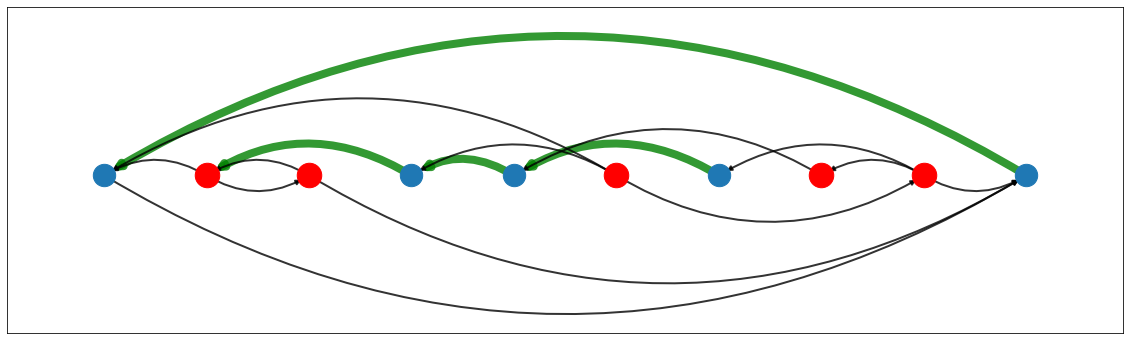

In [ ]:
#the old function for getCritValues is stored in the other colab file
def getCritValues(lot, bridgeChoice, chargeChoice):
  criticalVertexList=[]                                                         #V
  criticalEdgeList=[]                                                           #K
  L = gen(lot)
  for i in range(len(lot)):
    (x,y) = CriticalEdge(bridgeChoice[i],chargeChoice[L.index(selection(bridgeChoice[i], lot[i]))], lot[i])
    criticalEdgeList.append((x,y))
  for i in range(len(chargeChoice)):
    if chargeChoice[i] == 1:
      criticalVertexList.append((L[i], inn))
    else:
      criticalVertexList.append((L[i], out))

  return criticalVertexList, criticalEdgeList


def OrderedDraw(lot,bridges,charges,M):
  edgeList = getEdges(lot)
  edgeCopy = edgeList.copy()
  K = getVertices(lot)
  vertexCopy = K.copy()
  G = nx.MultiDiGraph()

  critVertices, critEdges = getCritValues(lot,bridges,charges)
  print(critEdges)
  print(edgeList)
  for edge in critEdges:
    if edge not in edgeCopy:
      flippedEdge = (edge[1],edge[0])
      edgeCopy.remove(flippedEdge)
    else:
      edgeCopy.remove(edge)
  for vertex in critVertices:
    vertexCopy.remove(vertex)

  pos = nx.spring_layout(G, scale=2, seed=80)
  x = 24
  for k in K:
	  #pos[k] = [Ord(k,M), 0+random.randint(0,5*x)]
    pos[k] = [Ord(k,M), 0]
  fig, ax = plt.subplots(1, 1, figsize=(20, 6));
  nx.draw_networkx_nodes(G,pos,  nodelist=critVertices,node_color='r',with_labels=True,node_size=600,alpha=1)
  nx.draw_networkx_nodes(G,pos, nodelist=list(set(K)-set(critVertices)),with_labels=True,node_size=500,alpha=1)
  nx.draw_networkx_edges(G,pos,edgelist=critEdges,width=8, alpha=0.8, edge_color='g',connectionstyle='arc3, rad=.3')
  nx.draw_networkx_edges(G,pos,edgelist=edgeCopy,width=2, alpha=0.8, connectionstyle='arc3, rad=.3')
  #nx.draw(G, pos, ax=ax, with_labels=True, arrows=True, connectionstyle='arc3, rad = .3')


#bridges = [E,E,E,W]
#charges = [1,1,-1,1,1]
#M =((4, 'out'), (2, 'inn'),   (5, 'out'),   (5, 'inn'),   (1, 'out'),   (1, 'inn'),   (3, 'out'),   (2, 'out'),   (4, 'inn'),   (3, 'inn'))

#bridges = ['W', 'W', 'W', 'E']
#charges = [1,1,-1,1,1]
#M = ((4, 'out'), (2, 'inn'), (5, 'out'), (5, 'inn'), (1, 'out'), (1, 'inn'), (3, 'out'), (2, 'out'), (4, 'inn'), (3, 'inn')) 


#confirmed by figure:
#bridges = ['W', 'W', 'W', 'E']
#charges =  [1, 1, -1, 1, -1]
#M=  ((4, 'out'),   (2, 'inn'),  (5, 'out'), (5, 'inn'),   (1, 'inn'),   (2, 'out'),   (1, 'out'),   (3, 'out'),   (3, 'inn'),   (4, 'inn'))

#bridges = ['W', 'W', 'W', 'E']
#charges =  [1, 1, -1, 1, -1]
#M=  ((4, 'out'),   (2, 'inn'),   (5, 'out'),   (5, 'inn'),   (2, 'out'),   (1, 'out'),   (1, 'inn'),   (3, 'inn'),   (4, 'inn'), (3, 'out'))


lot = [[1,5,2], [2,4,3], [3,1,4], [4,2,5]] 
bridges = ['W', 'W', 'W', 'E']
charges =  [1, 1, -1, 1, 1]
M=  ((4, 'out'),
   (2, 'inn'),
   (5, 'inn'),
   (5, 'out'),
   (1, 'out'),
   (1, 'inn'),
   (3, 'inn'),
   (3, 'out'),
   (4, 'inn'),
   (2, 'out'))

OrderedDraw(lot,bridges,charges,M)
  
    
#

In [ ]:
def randomSingleMain(lot, Repeats, Reveal):																											#Randomly samples orders of K, randomly samples charges as well. Works well.
	G = link(lot)
	L = gen(lot)
	K = getVertices(lot)
	bridgeList = injectiveBridges(lot)
	print("the number of injective bridge choices is ", len(bridgeList))
	chargeList = chargeBuilder(lot)
	goodList=[]
	for bridge in reversed(bridgeList):
		#goodList=[]
		for i in range(0, Repeats):
			charge = random.sample(chargeList, 1)[0]
			M = random_permutation(K)
			#if i % 10000 == 0:
			#	print(i)
			if (vertexcheck(bridge, charge, M, lot) and edgecheck(bridge, charge, M, lot)):
				goodList.append([bridge, charge, M])
		#print(bridge, len(goodList))
		#print(goodList)
	if Reveal:
		print(goodList)	
	return goodList


## #Works, randomly samples orders of K and uses only EW bridges to check for things.
def randomEWSingleMain(lot,Repeats,Reveal):
	G = link(lot)
	L = gen(lot)
	K = getVertices(lot)
	injectiveBridgeList=[]
	bridgeList = eastWestBridgeBuilder(lot)
	chargeList = chargeBuilder(lot)
	if (len(G.nodes()) != len(getVertices(lot))):   # is this garbage now?
		print("PROBLEM OF VERTICES")
		return K, G.nodes()
	for bridge in bridgeList:
		goodList = []
		if injective(bridge,lot):
			injectiveBridgeList.append(bridge)
	for bridge in injectiveBridgeList:
		for i in range(0, Repeats):
			charge = random.sample(chargeList, 1)[0]
			M = random_permutation(K)
			# if i % 10000 == 0:
			# 	print(i)
			if (vertexcheck(bridge, charge, M, lot) and edgecheck(bridge, charge, M, lot)):
				if reveal==True:
					print(M, charge)
				goodList.append([bridge, charge, M, lot])
		bridgeFlag = True		
		if reveal==True:
			print(bridge, len(goodList))
	return goodList
						
def randomEWSingleMainPlusCharge(lot,charge):																										#Works, randomly samples orders of K and uses only EW bridges to check for things.
	G = link(lot)
	L = gen(lot)
	K = getVertices(lot)
	injectiveBridgeList=[]
	bridgeList = eastWestBridgeBuilder(lot)
	if (len(G.nodes()) != len(getVertices(lot))):
		print("PROBLEM OF VERTICES")
		return K, G.nodes()
	for bridge in bridgeList:
		goodList = []
		if injective(bridge,lot):
			injectiveBridgeList.append(bridge)
	for bridge in injectiveBridgeList:
		for i in range(0, 60000):
			M = random_permutation(K)
			# if i % 10000 == 0:
			# 	print(i)
			if (vertexcheck(bridge, charge, M, lot) and edgecheck(bridge, charge, M, lot)):
				print(M, charge)
				goodList.append([bridge, charge, M, lot])
		bridgeFlag = True		
		print(bridge, len(goodList))
	return goodList


def mainEW(lot):																																	#The first rendition of the main program, it works.
	G = link(lot)
	L = gen(lot)
	K = getVertices(lot)
	chargeList = chargeBuilder(lot)
	bridgeList = eastWestBridgeBuilder(lot)
	goodList = []
	print(K)
	for M in itertools.permutations(K):
		#print('pooop')
		for charge in chargeList:
			for bridge in bridgeList:
				if injective(bridge, lot):
					if (vertexcheck(bridge, charge, M, lot) and edgecheck(bridge, charge, M, lot)):
						goodList.append([bridge, charge, M, lot])
						print([bridge, charge, M, lot])
	return goodList

def mainNS(lot):																																	#The first rendition of the main program, it works.
	G = link(lot)
	L = gen(lot)
	K = getVertices(lot)
	chargeList = chargeBuilder(lot)
	bridgeList = NorthSouthBridgeBuilder(lot)
	goodList = []

	for M in itertools.permutations(K):
		for charge in chargeList:
			#print(charge)
			for bridge in bridgeList:
				if injective(bridge, lot):
					#print(charge,bridge)
					if (vertexcheck(bridge, charge, M, lot) and edgecheck(bridge, charge, M, lot)):
						goodList.append([bridge, charge, M, lot])
						print([bridge, charge, M, lot])
						if len(goodList) > 0:
							return goodList



#lot = [[1,4,2], [3,1,2], [4,2,3]] # from figure 2 in text BEFORE FLIPPING
#lot = [[4,2,1]. [1,3,2].[2,1,3]] #cannot be aligned
#lot = [[1,5,2], [2,4,3], [3,1,4], [4,2,5]]       # tricky example but works with EW check carefully!
#lot = [[1,4,2],[2,1,3],[4,5,3],[4,1,5]]          # must fail
#lot = [[1,3,2], [2,1,3], [1,2,4], [5,4,1]]				#seems to fail  - maybe not broad enough search
#lot = [[1,3,2], [2,1,3], [1,2,4]]                  #subLOT of previous. Interesting results at R=1000. works plenty with EW
# lot = [[1,3,2],[2,1,3]]    
# G = link(lot)

# print(gen(lot))
#print(G.nodes())
#print(G.edges())
#print(lot)

#solutions=randomSingleMain(lot, Repeats=10000, Reveal=True)
#randomEWSingleMain(lot, Repeats=100000)
#randomSingleMain(lot)
#randomEWSingleMainPlusCharge(lot,	charge = [1,1,1,1])
#main(lot)()
# print(mainEW(lot))
#mainNS(lot)
#smallMain(lot, charge = [-1,-1,1,1])

#charge=[-1,-1,+1,-1,+1]
#bridges = ['N','S','N','N']
#M = ((5, 'inn'), (5, 'out'), (4, 'out'), (2, 'out'), (3, 'inn'), (4, 'inn'), (1, 'inn'), (2, 'inn'), (3, 'out'), (1, 'out'))
#M = ((5, 'out'), (5, 'inn'), (4, 'out'), (2, 'out'), (3, 'inn'), (1, 'inn'), (4, 'inn'), (2, 'inn'), (1, 'out'), (3, 'out'))
#ManualMain(lot, charge, bridges, M)

#M= ((4, 'out'), (1, 'inn'), (4, 'inn'), (3, 'out'), (3, 'inn'), (2, 'out'), (2, 'inn'), (1, 'out'), (5, 'inn'), (5, 'out')) 
#charge =[-1, -1, 1, -1,1]
#bridge = [E,E,E,W]
#ManualMain(lot, charge, bridges, M)

In [ ]:
lot = [[1,3,2],[2,1,3]]
print(mainEW(lot))


[(1, 'inn'), (1, 'out'), (2, 'inn'), (2, 'out'), (3, 'inn'), (3, 'out')]
[['E', 'E'], [-1, 1, -1], ((1, 'inn'), (3, 'inn'), (1, 'out'), (2, 'inn'), (2, 'out'), (3, 'out')), [[1, 3, 2], [2, 1, 3]]]
[['E', 'E'], [-1, -1, -1], ((1, 'inn'), (3, 'inn'), (1, 'out'), (2, 'inn'), (2, 'out'), (3, 'out')), [[1, 3, 2], [2, 1, 3]]]
[['E', 'E'], [-1, 1, -1], ((1, 'inn'), (3, 'inn'), (1, 'out'), (2, 'inn'), (3, 'out'), (2, 'out')), [[1, 3, 2], [2, 1, 3]]]
[['E', 'E'], [-1, -1, -1], ((1, 'inn'), (3, 'inn'), (1, 'out'), (2, 'inn'), (3, 'out'), (2, 'out')), [[1, 3, 2], [2, 1, 3]]]
[['E', 'E'], [-1, 1, -1], ((1, 'inn'), (3, 'inn'), (1, 'out'), (2, 'out'), (2, 'inn'), (3, 'out')), [[1, 3, 2], [2, 1, 3]]]
[['E', 'E'], [-1, -1, -1], ((1, 'inn'), (3, 'inn'), (1, 'out'), (2, 'out'), (2, 'inn'), (3, 'out')), [[1, 3, 2], [2, 1, 3]]]
[['E', 'E'], [-1, 1, -1], ((1, 'inn'), (3, 'inn'), (1, 'out'), (2, 'out'), (3, 'out'), (2, 'inn')), [[1, 3, 2], [2, 1, 3]]]
[['E', 'E'], [-1, -1, -1], ((1, 'inn'), (3, 'inn'), (1, 

In [ ]:
print(lot)
#solutions is for a different LOT so this code doesn't compile right now
solutions = [[['W', 'W', 'E'], [1, 1, 1, -1], ((4, 'inn'), (3, 'out'), (4, 'out'), (1, 'out'), (2, 'out'), (2, 'inn'), (3, 'inn'), (1, 'inn'))], [['W', 'W', 'E'], [1, 1, 1, 1], ((4, 'out'), (3, 'out'), (1, 'out'), (2, 'out'), (1, 'inn'), (4, 'inn'), (2, 'inn'), (3, 'inn'))], [['W', 'W', 'E'], [1, 1, 1, -1], ((3, 'out'), (1, 'out'), (4, 'inn'), (4, 'out'), (2, 'out'), (1, 'inn'), (3, 'inn'), (2, 'inn'))], [['E', 'E', 'E'], [-1, -1, 1, 1], ((1, 'inn'), (3, 'inn'), (3, 'out'), (2, 'out'), (2, 'inn'), (1, 'out'), (4, 'out'), (4, 'inn'))], [['E', 'E', 'E'], [-1, -1, 1, 1], ((1, 'inn'), (4, 'out'), (3, 'inn'), (4, 'inn'), (2, 'out'), (2, 'inn'), (1, 'out'), (3, 'out'))], [['E', 'E', 'E'], [-1, -1, 1, 1], ((1, 'inn'), (3, 'inn'), (4, 'inn'), (3, 'out'), (2, 'out'), (1, 'out'), (2, 'inn'), (4, 'out'))], [['E', 'E', 'E'], [-1, -1, 1, -1], ((4, 'inn'), (4, 'out'), (1, 'inn'), (3, 'inn'), (3, 'out'), (2, 'out'), (1, 'out'), (2, 'inn'))], [['E', 'E', 'E'], [-1, -1, 1, 1], ((4, 'out'), (4, 'inn'), (1, 'inn'), (3, 'inn'), (2, 'out'), (1, 'out'), (2, 'inn'), (3, 'out'))], [['E', 'N', 'E'], [-1, -1, 1, 1], ((4, 'out'), (3, 'inn'), (4, 'inn'), (2, 'inn'), (1, 'inn'), (3, 'out'), (2, 'out'), (1, 'out'))], [['E', 'N', 'E'], [-1, -1, 1, 1], ((3, 'inn'), (4, 'inn'), (4, 'out'), (1, 'inn'), (3, 'out'), (2, 'out'), (1, 'out'), (2, 'inn'))], [['E', 'N', 'E'], [-1, -1, 1, 1], ((3, 'inn'), (4, 'out'), (2, 'out'), (1, 'inn'), (4, 'inn'), (2, 'inn'), (3, 'out'), (1, 'out'))], [['E', 'N', 'E'], [-1, -1, 1, -1], ((3, 'inn'), (1, 'inn'), (3, 'out'), (4, 'inn'), (2, 'out'), (2, 'inn'), (1, 'out'), (4, 'out'))], [['E', 'N', 'E'], [-1, -1, 1, -1], ((4, 'inn'), (4, 'out'), (3, 'inn'), (2, 'inn'), (2, 'out'), (1, 'out'), (1, 'inn'), (3, 'out'))], [['E', 'N', 'E'], [-1, -1, 1, 1], ((3, 'inn'), (1, 'inn'), (4, 'inn'), (4, 'out'), (2, 'inn'), (2, 'out'), (3, 'out'), (1, 'out'))], [['E', 'N', 'E'], [-1, -1, 1, -1], ((3, 'inn'), (1, 'inn'), (3, 'out'), (2, 'out'), (4, 'inn'), (1, 'out'), (2, 'inn'), (4, 'out'))], [['E', 'N', 'E'], [-1, -1, 1, -1], ((3, 'inn'), (2, 'out'), (1, 'inn'), (3, 'out'), (2, 'inn'), (4, 'out'), (4, 'inn'), (1, 'out'))], [['E', 'N', 'E'], [-1, -1, 1, 1], ((3, 'inn'), (4, 'out'), (2, 'out'), (1, 'inn'), (4, 'inn'), (3, 'out'), (1, 'out'), (2, 'inn'))], [['E', 'N', 'E'], [-1, -1, 1, 1], ((3, 'inn'), (2, 'out'), (1, 'inn'), (3, 'out'), (4, 'out'), (1, 'out'), (2, 'inn'), (4, 'inn'))], [['E', 'N', 'E'], [-1, -1, 1, 1], ((3, 'inn'), (1, 'inn'), (2, 'out'), (4, 'inn'), (3, 'out'), (4, 'out'), (2, 'inn'), (1, 'out'))], [['E', 'N', 'E'], [-1, -1, 1, 1], ((3, 'inn'), (4, 'inn'), (2, 'out'), (1, 'inn'), (3, 'out'), (1, 'out'), (4, 'out'), (2, 'inn'))], [['E', 'N', 'E'], [-1, -1, 1, 1], ((3, 'inn'), (1, 'inn'), (2, 'out'), (3, 'out'), (4, 'inn'), (2, 'inn'), (4, 'out'), (1, 'out'))], [['S', 'W', 'E'], [1, 1, 1, 1], ((1, 'out'), (4, 'inn'), (3, 'out'), (2, 'out'), (4, 'out'), (1, 'inn'), (3, 'inn'), (2, 'inn'))], [['S', 'W', 'E'], [1, 1, 1, -1], ((1, 'out'), (4, 'inn'), (2, 'out'), (3, 'out'), (4, 'out'), (3, 'inn'), (2, 'inn'), (1, 'inn'))], [['S', 'S', 'E'], [1, 1, 1, 1], ((4, 'inn'), (2, 'out'), (1, 'out'), (3, 'out'), (4, 'out'), (2, 'inn'), (3, 'inn'), (1, 'inn'))], [['S', 'S', 'E'], [1, 1, 1, 1], ((4, 'inn'), (2, 'out'), (1, 'out'), (3, 'out'), (1, 'inn'), (2, 'inn'), (4, 'out'), (3, 'inn'))], [['S', 'S', 'E'], [1, 1, 1, 1], ((2, 'out'), (1, 'out'), (3, 'out'), (4, 'out'), (1, 'inn'), (2, 'inn'), (3, 'inn'), (4, 'inn'))], [['S', 'S', 'E'], [1, 1, 1, 1], ((4, 'out'), (2, 'out'), (1, 'out'), (4, 'inn'), (3, 'out'), (3, 'inn'), (1, 'inn'), (2, 'inn'))], [['S', 'N', 'E'], [-1, -1, 1, 1], ((2, 'out'), (3, 'inn'), (4, 'out'), (4, 'inn'), (1, 'inn'), (1, 'out'), (3, 'out'), (2, 'inn'))], [['S', 'N', 'E'], [-1, -1, 1, 1], ((2, 'out'), (3, 'inn'), (4, 'out'), (4, 'inn'), (1, 'inn'), (1, 'out'), (2, 'inn'), (3, 'out'))], [['S', 'N', 'E'], [-1, -1, 1, -1], ((4, 'out'), (2, 'out'), (3, 'inn'), (1, 'inn'), (3, 'out'), (4, 'inn'), (1, 'out'), (2, 'inn'))]]
def DrawBunch(lot,solutions):
    for s in solutions: 
      print(s) 
      #ready=input("Next Solution: ") didn't know to draw these one at a time...
      OrderedDraw(lot,s[0], s[1], s[2])

# DrawBunch(lot,solutions)

[[1, 3, 2], [2, 1, 3]]


In [ ]:
#length 3 Inj
#lot = [[1,2,3], [3,1,4], [1,4,2]]
#lot = [[1,3,2], [2,3,4], [2,1,3]]
#lot = [[1,2,4], [1,4,5], [1,3,2]]

#length 4 Inj
#a tricky example:
#lot = [[1,5,2], [2,4,3], [3,1,4], [4,2,5]]       # tricky example
# solutions were hard to find for compute (repeat =100000 using EW)
# one soluition has:
# bridge  = ['W', 'W', 'W', 'E']
# charge =  [1, 1, -1, 1, 1]
# M =  ((4, 'out'), (2, 'inn'),   (5, 'out'),   (5, 'inn'),   (1, 'out'),   (1, 'inn'),   (3, 'out'),   (2, 'out'),   (4, 'inn'),   (3, 'inn'))

#lot = [[1,3,2], [2,1,3], [1,2,4], [5,4,1]]       # is this interesting? claimed no good stacking... maybe
#lot = [[1,3,2], [2,1,3], [1,2,4]]                # sub of above
#lot = [[1,3,2], [2,1,3], [1,5,4], [5,4,1]]
#lot = [[1,3,2], [2,1,3] ,[1,2,4] ,[1,4,5]]        boundary reducible

#length 4 nonInj
#lot = [[1,4,2],[2,1,3],[4,5,3],[4,1,5]]          # must fail